# Step 1. Check Train, Test Set and Files

1. check number of train samples and train samples in `train_labels.csv` file
2. check size and resolution of train and test samples

In [20]:
###############################################
# Check the number of training sample whether #
# equals to the number of samples in          #
# `train_label.csv` file provided.            #
###############################################
train_img_dir = "../data/train/"
test_img_dir = "../data/test/"
train_label_dir = "../data/train_labels.csv"

import os
train_img_name_list = os.listdir(train_img_dir)
train_img_dir_list = map(lambda img_name: train_img_dir+img_name, train_img_name_list)
print("len(train_img_dir_list):{}".format(len(train_img_dir_list)))

test_img_name_list = os.listdir(test_img_dir)
test_img_dir_list = map(lambda img_name: test_img_dir+img_name, test_img_name_list)
print("len(test_img_dir_list):{}".format(len(test_img_dir_list)))

import pandas as pd
train_label_csv = pd.read_csv(train_label_dir)
print("train_label_csv.count()[0]:{}".format(train_label_csv.count()[0]))
if len(train_img_name_list) == train_label_csv.count()[0]:
    print("[OK] The number of train images equals to the sample number of in `train_labels.csv` file.")    
print("[train_label_csv summary]")
print("column name:"),
for col_idx in xrange(len(train_label_csv.columns)): print(col_idx, train_label_csv.columns[col_idx]),

len(train_img_dir_list):2295
len(test_img_dir_list):1531
train_label_csv.count()[0]:2295
[OK] The number of train images equals to the sample number of in `train_labels.csv` file.
[train_label_csv summary]
column name: (0, 'name') (1, 'invasive')


In [21]:
################################
# `train_label_csv`file header #
################################
train_label_csv.head()

name  invasive
0     1         0
1     2         0
2     3         1
3     4         0
4     5         1

In [40]:
print("train_label_csv['invasive'].sum():{}".format(train_label_csv['invasive'].sum()))
print("invasive rate:{}".format(train_label_csv['invasive'].sum()/float(train_label_csv['invasive'].count())))   

train_label_csv['invasive'].sum():1448
invasive rate:0.630936819172


In [3]:
###################################################
# Check samples number in `sample_submission.csv` #
###################################################
sample_submission_csv = "../data/sample_submission.csv"
import pandas as pd
sample_submission_csv_pd = pd.read_csv(sample_submission_csv)
print("sample_submission_csv_pd.count()[0]:{}".format(sample_submission_csv_pd.count()[0]))

test_img_dir = "../data/test"
test_img_name_list = os.listdir(test_img_dir)
test_img_dir_list = map(lambda img_name: test_img_dir+img_name, test_img_name_list)
print("len(test_img_dir_list):{}".format(len(test_img_dir_list)))

if sample_submission_csv_pd.count()[0] == len(test_img_dir_list):
    print("[OK] The number of test images equals to the samples in `sample_submission.csv` file.")

sample_submission_csv_pd.count()[0]:1531
len(test_img_dir_list):1531
[OK] The number of test images equals to the samples in `sample_submission.csv` file.


In [4]:
######################################
# `sample_submission.csv`file header #
######################################
sample_submission_csv_pd.head()

name  invasive
0     1       0.5
1     2       0.5
2     3       0.5
3     4       0.5
4     5       0.5

len(train_img_size_list):2295
len(train_img_size_set):78
len(train_img_size_and_count_list):78


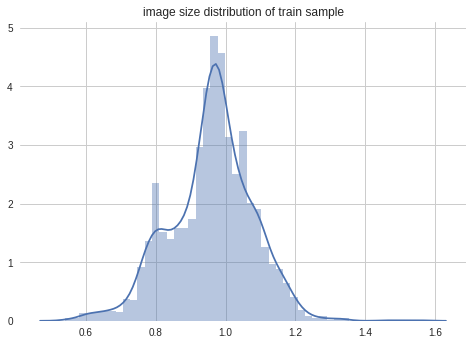

len(train_img_shape_list):2295
len(train_img_shape_set):1
train_img_shape_set:set(['866*1154*3'])


In [5]:
##############################################
# check size and resolution of train samples #
##############################################

##############################
# check size of train sample #
##############################
def get_img_size_MB(img_path):
    import os
    return round(os.path.getsize(img_path)/1024./1024., 2)

train_img_size_list = map(lambda train_img_path: get_img_size_MB(train_img_path), train_img_dir_list)
train_img_size_set = set(train_img_size_list)
train_img_size_and_count_list = []
for img_size in train_img_size_set:
    train_img_size_and_count_list.append([img_size, train_img_size_list.count(img_size)])

train_img_size_and_count_list.sort()
print("len(train_img_size_list):{}".format(len(train_img_size_list)))
print("len(train_img_size_set):{}".format(len(train_img_size_set)))
print("len(train_img_size_and_count_list):{}".format(len(train_img_size_and_count_list)))

##########################################
# plot size distribution of train sample #
##########################################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  

sns.set_style("whitegrid")  
sns.distplot(train_img_size_list)
plt.figure(1)
plt.title("image size distribution of train sample")
plt.box()
plt.show()

####################################
# check resolution of train sample #
####################################
import cv2

train_img_shape_list = map(lambda img_path: "*".join(map(str, cv2.imread(img_path).shape)), train_img_dir_list)
train_img_shape_set = set(train_img_shape_list)
print("len(train_img_shape_list):{}".format(len(train_img_shape_list)))
print("len(train_img_shape_set):{}".format(len(train_img_shape_set)))
print("train_img_shape_set:{}".format(train_img_shape_set))

len(test_img_size_list):1531
len(test_img_size_set):86
len(test_img_size_and_count_list):86


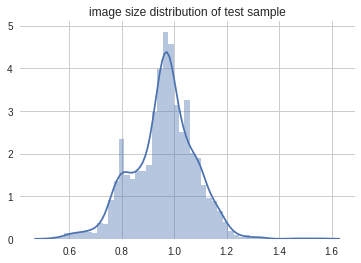

len(test_img_shape_list):1531
len(test_img_shape_set):2
test_img_shape_set:set(['866*1154*3', '1154*866*3'])
test_img_shape_list.count(866*1154*3):1530
test_img_shape_list.count(1154*866*3):1


In [8]:
##############################################
# check size and resolution of test samples  #
##############################################

##############################
# check size of test sample  #
##############################
def get_img_size_MB(img_path):
    import os
    return round(os.path.getsize(img_path)/1024./1024., 2)

test_img_size_list = map(lambda img_path: get_img_size_MB(img_path), test_img_dir_list)
test_img_size_set = set(test_img_size_list)
test_img_size_and_count_list = []
for img_size in test_img_size_set:
    test_img_size_and_count_list.append([img_size, test_img_size_list.count(img_size)])

test_img_size_and_count_list.sort()
print("len(test_img_size_list):{}".format(len(test_img_size_list)))
print("len(test_img_size_set):{}".format(len(test_img_size_set)))
print("len(test_img_size_and_count_list):{}".format(len(test_img_size_and_count_list)))

##########################################
# plot size distribution of test sample  #
##########################################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  

sns.set_style("whitegrid")  
sns.distplot(train_img_size_list)
plt.figure(1)
plt.title("image size distribution of test sample")
plt.box()
plt.show()

####################################
# check resolution of test sample #
####################################
import cv2

test_img_shape_list = map(lambda img_path: "*".join(map(str, cv2.imread(img_path).shape)), test_img_dir_list)
test_img_shape_set = set(test_img_shape_list)
print("len(test_img_shape_list):{}".format(len(test_img_shape_list)))
print("len(test_img_shape_set):{}".format(len(test_img_shape_set)))
print("test_img_shape_set:{}".format(test_img_shape_set))
for test_img_shape in test_img_shape_set:
    print("test_img_shape_list.count({}):{}".format(test_img_shape, test_img_shape_list.count(test_img_shape)))

We can see two kinds of image shape in test set:

* `866*1154*3`: 1530 images
* `1154*866*3`: only 1 image

Thus, we need to make resize the unique abnormal image to common shape. Let's find what's the name of unique abnormal image:

In [9]:
import cv2

unique_shape = (1154, 866, 3)
unique_shape_img_dir_list = filter(lambda img_path: cv2.imread(img_path).shape == unique_shape, test_img_dir_list)
print("unique_shape_img_dir_list:{}".format(unique_shape_img_dir_list))

unique_shape_img_dir_list:['../data/test/1068.jpg']


# Step2. Observe Image Feature

However, we can have a look about this image next!

## Step2.1 Histogram Equalization

The picture is from wiki about `histogram`. For the histogram used in digital image processing, see Image histogram and Color histogram.

Below definition is from Wiki:

A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable) and was first introduced by Karl Pearson. It is a kind of bar graph. To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size.

![asb](./nb-img/Histogrammspreizung.png)

Next, we will show what're the histograms of these images below and make histogram equalization for them.

1. blur image  
2. normal image
3. too white image
4. too dark image

First, Let's look a blured image, selected from training set.

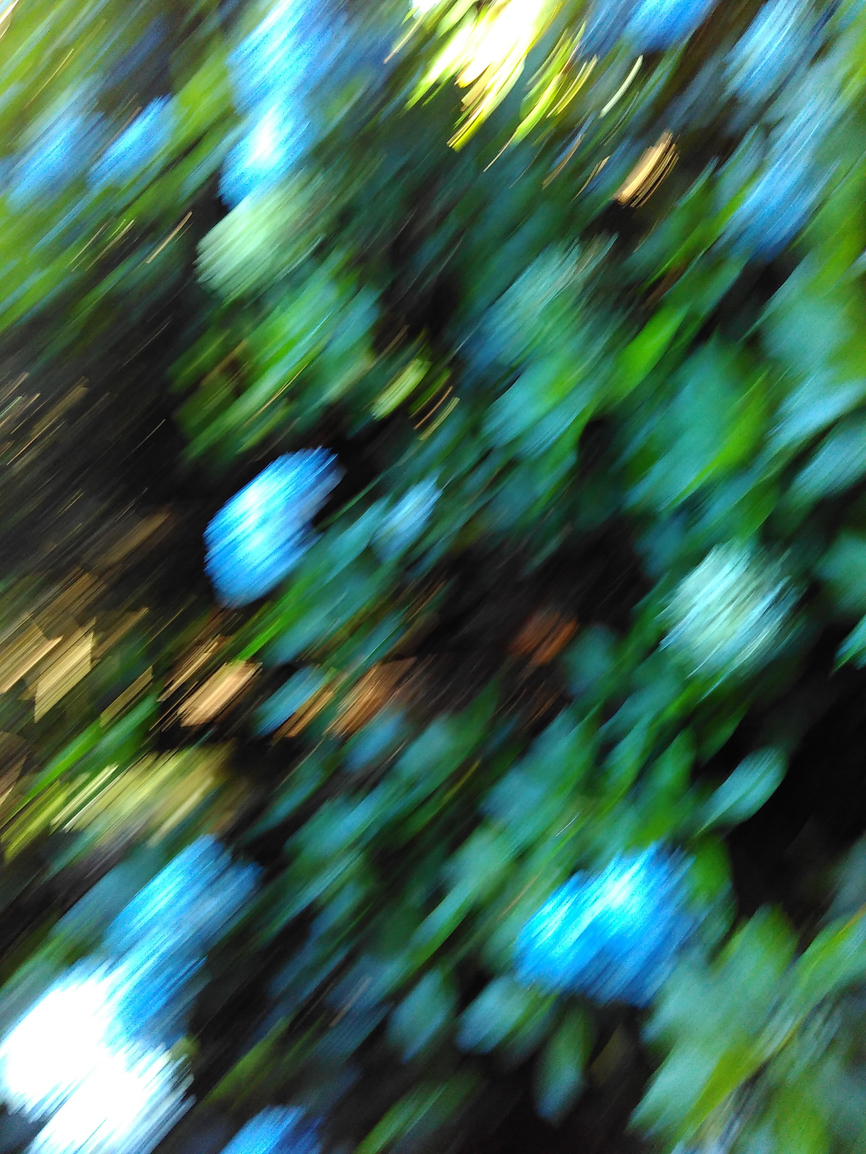

In [10]:
img_dir = unique_shape_img_dir_list[0]
from IPython.display import Image 
Image(filename=img_dir)

It seems not a good image (training sample), blured image,  which we can drop.

Next, we can have a look about its histogram.

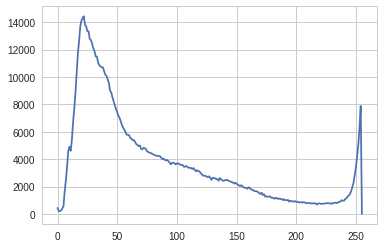

In [11]:
import cv2

unique_shape_test_img = cv2.imread(unique_shape_img_dir_list[0])
hist = cv2.calcHist([unique_shape_test_img], [0], None, [256], [0, 255])  
plt.plot(hist)

In [18]:
unique_shape_test_img

array([[[196, 236, 234],
        [203, 230, 221],
        [208, 224, 207],
        ..., 
        [207, 208, 110],
        [181, 189, 118],
        [180, 184, 119]],

       [[197, 228, 225],
        [199, 219, 207],
        [213, 222, 202],
        ..., 
        [184, 180,  91],
        [180, 186, 115],
        [167, 177, 107]],

       [[202, 224, 219],
        [205, 216, 200],
        [222, 225, 199],
        ..., 
        [179, 176,  95],
        [166, 172, 101],
        [147, 170,  78]],

       ..., 
       [[ 76,  61,  29],
        [ 78,  62,  39],
        [ 73,  52,  44],
        ..., 
        [ 59, 102,  51],
        [ 60, 102,  54],
        [ 63, 103,  61]],

       [[ 67,  60,  33],
        [ 67,  57,  39],
        [ 63,  49,  43],
        ..., 
        [ 61, 104,  61],
        [ 61, 104,  59],
        [ 65, 107,  66]],

       [[ 66,  57,  47],
        [ 58,  48,  41],
        [ 61,  49,  47],
        ..., 
        [ 62, 104,  63],
        [ 64, 106,  65],
        [ 67, 108,

Next, Let's look a normal image, selected from training set also.

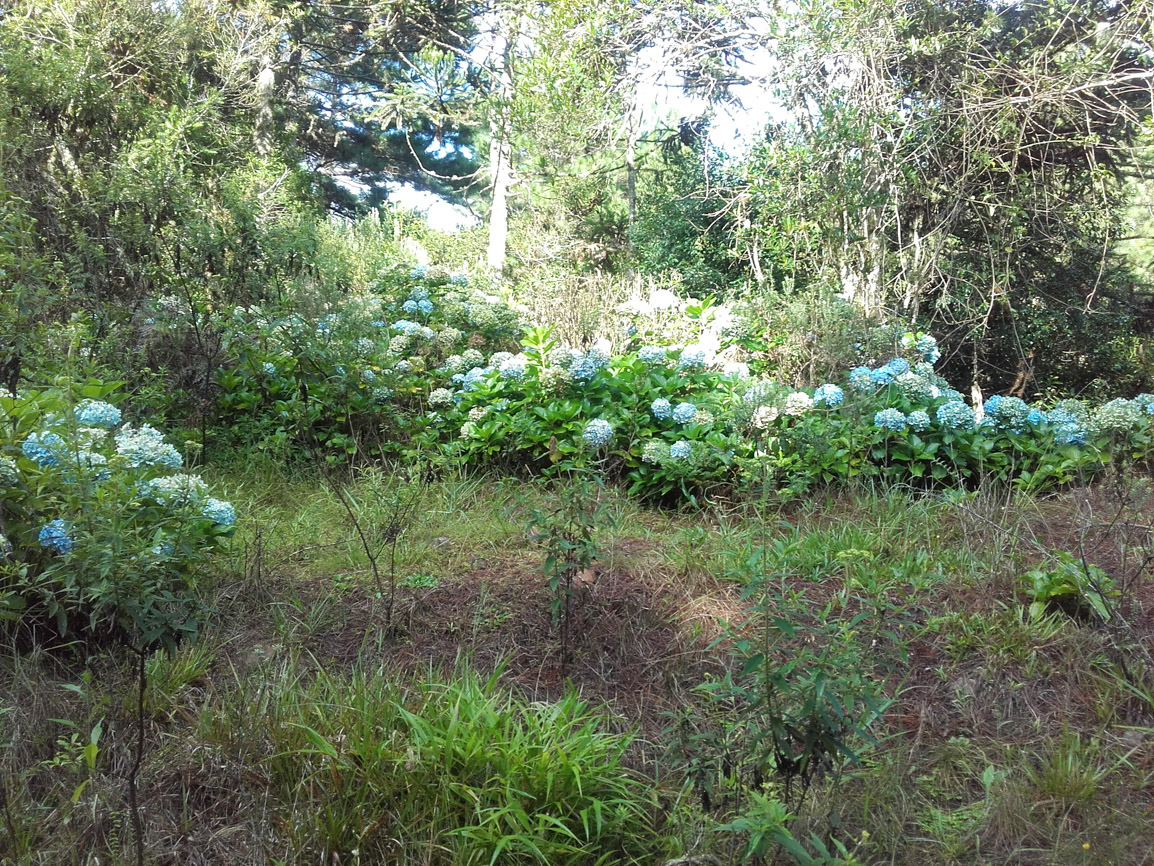

In [19]:
from IPython.display import Image 
Image(filename=train_img_dir_list[0])

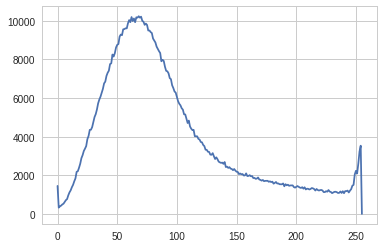

In [41]:
hist = cv2.calcHist([cv2.imread(train_img_dir_list[0])], [0], None, [256], [0, 255])
plt.plot(hist)

Third, Let's look a too white image, selected from training set.

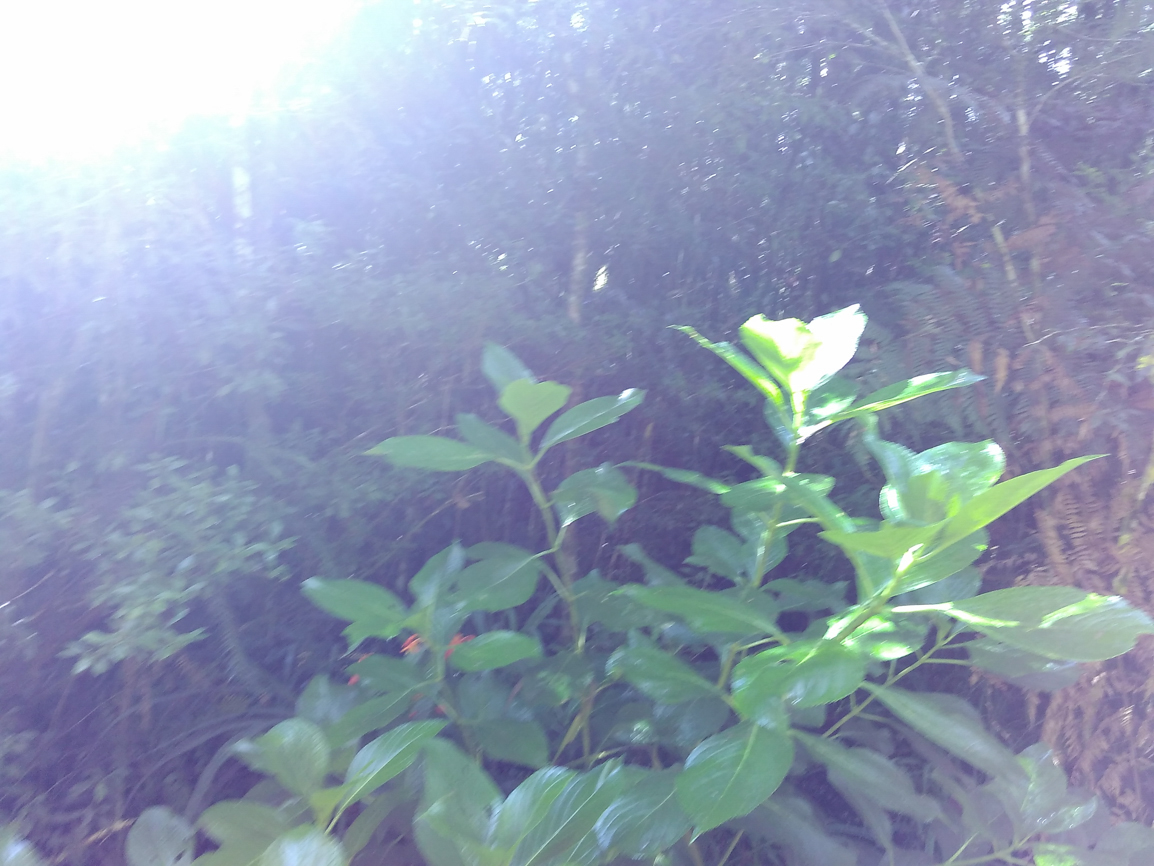

In [42]:
from IPython.display import Image 
Image(filename="../data/train/34.jpg")

../data/train/34.jpg


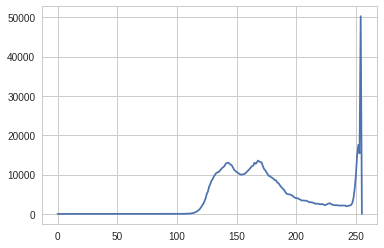

In [43]:
img_dir = "../data/train/34.jpg"
print img_dir
from IPython.display import Image 
Image(filename=img_dir)

hist = cv2.calcHist([cv2.imread(img_dir)], [0], None, [256], [0, 255])
plt.plot(hist)

Last, Let's look a dark image, selected from training set.

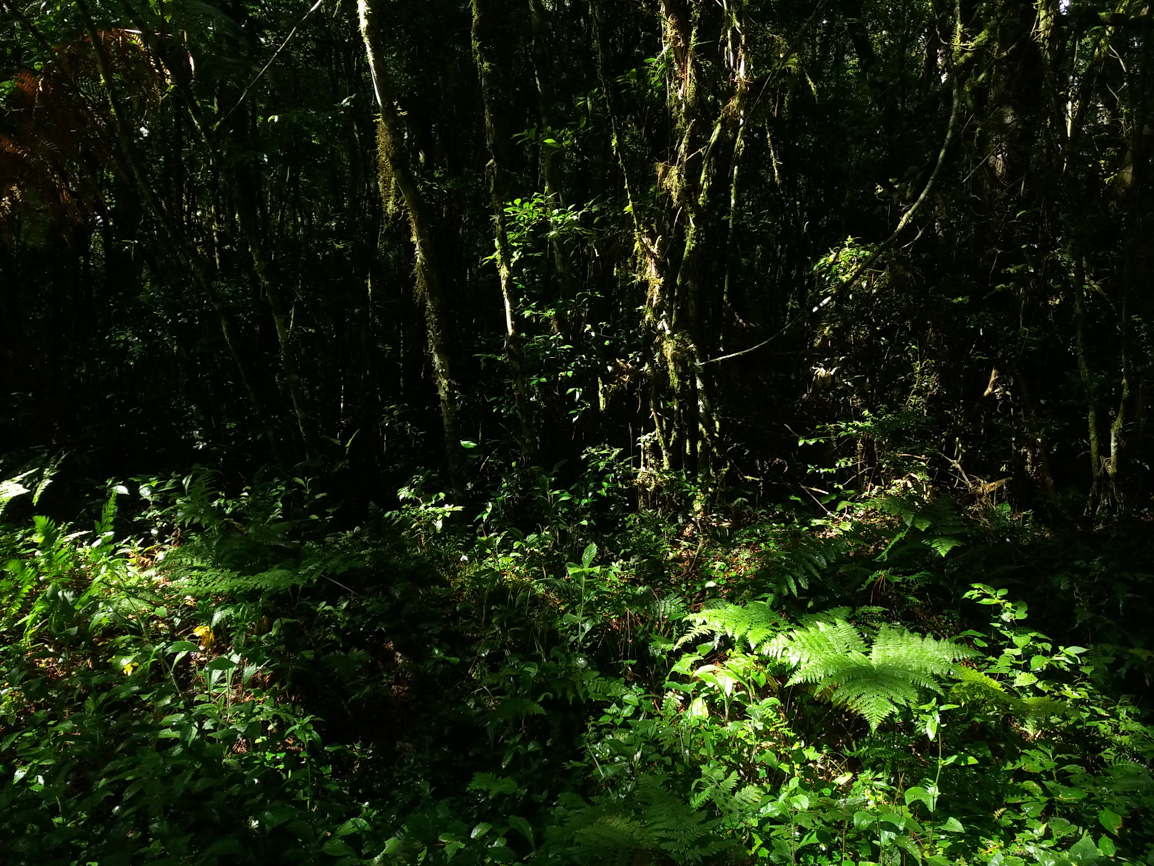

In [44]:
img_dir = "../data/train/431.jpg"
from IPython.display import Image
Image(filename=img_dir)

../data/train/431.jpg


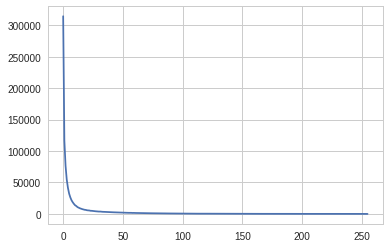

In [45]:
print img_dir
from IPython.display import Image 
Image(filename=img_dir)

hist = cv2.calcHist([cv2.imread(img_dir)], [0], None, [256], [0, 255])
plt.plot(hist)

# Step 3. Fold training set according to `train_labels.csv`

Prepare for generating MXNet `rec` format data.

In [78]:
###########################
# Load `train_labels.csv` #
###########################
import pandas as pd
import os

train_img_dir = "../data/train/"
train_label_dir = "../data/train_labels.csv"
train_label_pd = pd.read_csv(train_label_dir)
train_name_list = map(str, list(train_label_pd['name'].values))
train_label_list = map(str, list(train_label_pd['invasive'].values))

############################################
# Create new train set directory preparing #
#        for MXNet generating `rec` format #
#        data.                             #
############################################
new_train_dir_prepare4mxnet = "../data/prepare-4-mxnet/"
if not os.path.exists(new_train_dir_prepare4mxnet):
    os.mkdir(new_train_dir_prepare4mxnet)

new_train_invasive_type_dir = "../data/prepare-4-mxnet/invasive/"
new_train_not_invasive_type_dir = "../data/prepare-4-mxnet/not-invasive/"

if not os.path.exists(new_train_invasive_type_dir):
    os.mkdir(new_train_invasive_type_dir)
    
if not os.path.exists(new_train_not_invasive_type_dir):
    os.mkdir(new_train_not_invasive_type_dir)

In [86]:
#####################################################
# Copy train data in their respective paths,        #
#      defined by respective image label.           #
#####################################################
INVASIVE_TYPE = str(1)
NOT_INVASIVE_TYPE = str(0)

train_name_and_label_tuple_list = map(lambda name, label:\
                                      (name, label),\
                                      train_name_list, train_label_list)
invasive_name_and_label_tuple_list = filter(lambda (name, label):\
                                           label==INVASIVE_TYPE,\
                                           train_name_and_label_tuple_list)
not_invasive_name_and_label_tuple_list = filter(lambda (name, label):\
                                               label==NOT_INVASIVE_TYPE,\
                                               train_name_and_label_tuple_list)

print("len(invasive_name_and_label_tuple_list):{}".format(len(invasive_name_and_label_tuple_list)))
print("len(not_invasive_name_and_label_tuple_list):{}".format(len(not_invasive_name_and_label_tuple_list)))

invasive_name_list = map(lambda (name, label):\
                        name,\
                        invasive_name_and_label_tuple_list)
not_invasive_name_list = map(lambda (name, label):\
                            name,\
                            not_invasive_name_and_label_tuple_list)

print("len(invasive_name_list):{}".format(len(invasive_name_list)))
print("len(not_invasive_name_list):{}".format(len(not_invasive_name_list)))

len(invasive_name_and_label_tuple_list):1448
len(not_invasive_name_and_label_tuple_list):847
len(invasive_name_list):1448
len(not_invasive_name_list):847


In [93]:
###########################################
# Prepare copy command for two train type #
###########################################

import os

original_train_path = "../data/train/"
new_train_invasive_type_path = "../data/prepare-4-mxnet/invasive/"
new_train_not_invasive_type_path = "../data/prepare-4-mxnet/not-invasive/"
image_suffix = ".jpg"

original_train_invasive_image_path_list = map(lambda name:\
                                              original_train_path+name+image_suffix,\
                                             invasive_name_list)
original_train_not_invasive_image_path_list = map(lambda name:\
                                                  original_train_path+name+image_suffix,\
                                                  not_invasive_name_list)
#################################
# Execute copy process          #
#################################

cp_original_invasive_train_img_to_new_path_cmd = "cp " + " ".join(original_train_invasive_image_path_list) + " " + new_train_invasive_type_path
os.system(cp_original_invasive_train_img_to_new_path_cmd)

cp_original_not_invasive_train_img_to_new_path_cmd = "cp " + " ".join(original_train_not_invasive_image_path_list) + " " + new_train_not_invasive_type_path
os.system(cp_original_not_invasive_train_img_to_new_path_cmd)

0

# Step 4. Generate MXNet format data

I put `./mxnet/tools` into my `data` directory, renamed as `mxnet-tools`, like this:

```Shell
|-- LICENSE
|-- README.md
|-- code
|   |-- 00.observe-raw-data-and-make-preprocessing.ipynb
|   |-- lines.html
|   `-- nb-img
`-- data
    |-- mxnet-tools
    |-- prepare-4-mxnet
    |-- sample_submission.csv
    |-- test
    |-- train
    `-- train_labels.csv

```

Next, I enter my `MXNet` docker container, to [generate MXNet `rec` format data](https://github.com/dmlc/mxnet/tree/master/example/image-classification#prepare-datasets) below:

```Shell
root@fe5cd2904efc:/home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data# ls
ism-train.lst  ism-train_.lst  ism-train_train.lst  ism-train_val.lst  mxnet-tools  prepare-4-mxnet  sample_submission.csv  test  train  train_labels.csv

root@fe5cd2904efc:/home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data# python mxnet-tools/im2rec.py --list True --recursive True --train-ratio 0.95 ism-train ./prepare-4-mxnet/
libdc1394 error: Failed to initialize libdc1394
invasive 0
not-invasive 1

root@fe5cd2904efc:/home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data# python mxnet-tools/im2rec.py --resize 224 --quality 95 --num-thread 8 ism-train ./prepare-4-mxnet/
libdc1394 error: Failed to initialize libdc1394
Creating .rec file from /home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data/ism-train.lst in /home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data
Creating .rec file from /home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data/ism-train_.lst in /home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data
Creating .rec file from /home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data/ism-train_val.lst in /home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data
time: 0.044196844101  count: 0
Creating .rec file from /home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data/ism-train_train.lst in /home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data
time: 0.0375051498413  count: 0
time: 5.89290904999  count: 1000
time: 4.6688849926  count: 2000

root@fe5cd2904efc:/home/yuens/Documents/charm/kaggle-invasive-species-monitoring-classification/data# ll
total 126064
drwxrwxr-x 6 yuens yuens      4096 Jun 25 14:35 ./
drwxrwxr-x 6 yuens yuens      4096 Jun 23 14:04 ../
-rw-r--r-- 1 root  root      29647 Jun 25 14:35 ism-train_train.idx
-rw-r--r-- 1 root  root      70873 Jun 25 14:35 ism-train_train.lst
-rw-r--r-- 1 root  root  122294728 Jun 25 14:35 ism-train_train.rec
-rw-r--r-- 1 root  root       1423 Jun 25 14:35 ism-train_val.idx
-rw-r--r-- 1 root  root       3738 Jun 25 14:35 ism-train_val.lst
-rw-r--r-- 1 root  root    6512948 Jun 25 14:35 ism-train_val.rec
drwxrwxr-x 7 yuens yuens      4096 Jun 25 03:49 mxnet-tools/
drwxrwxr-x 4 yuens yuens      4096 Jun 25 13:57 prepare-4-mxnet/
-rwxrwxrwx 1 yuens yuens     14218 May  3 08:26 sample_submission.csv*
drwxrwxrwx 2 yuens yuens     36864 May 21 04:54 test/
drwxrwxrwx 2 yuens yuens     65536 May 21 04:58 train/
-rwxrwxrwx 1 yuens yuens     17268 May  3 08:30 train_labels.csv*
```